# Analysing IMDB Data

## Introduction

The movie industry is one of the most impactful and financially successful industries on 21 century and controlling, analysing this sphere is very important.
For now, IMDB is one of the most visited websites that contains full information about movies.
The following analysis will provide an overview of the development of this industry and future perspectives.

# Data description

Dataset has information about movies that was released in 20 and 21 century. There are 21 columns and 85855 rows.
Columns:
- imdb_title_id - ID in IMDB database
- title - Translated Movie title,
- original_title - Original Movie title 
- year - release year
- date_published - date when movie was released
- genre - movie genres (can be 2 or more) 
- duration - movie duration in minutes 
- country - country of which the film belongs 
- language - original language and translated languages 
- director - director full name 
- writer - writer full name
- production_company - company that filmed movie 
- actors - famous actors list 
- description - movie plot description 
- avg_vote - average user rating 
- votes - number of votes 
- budget - money allocated for production
- usa_gross_income - income in USA only 
- worlwide_gross_income - world total income 
- metascore - critics raing
- reviews_from_users - number of users reviews 
- reviews_from_critics - total number of critics reviews

## Research question and objectives

1. Provide an overview of income of the Movie industry by analysing every year's results.
2. How genre combinations and release date can affect at income?
3. Analysing critics and users opinion about IMDB's highest voted movies.
4. Which movie genres are preferred by each country in 2020 ?
5. Divide movies into groups by duration and find does duration affect at a number of votes?

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import seaborn as sns

In [2]:
df=pd.read_csv("IMDb movies.csv",low_memory=False)
df.set_index('imdb_title_id',inplace=True)
df['budget']=df['budget'].str.extract('(\d+)', expand=False)
df['usa_gross_income']=df['usa_gross_income'].str.extract('(\d+)', expand=False)
df['worlwide_gross_income']=df['worlwide_gross_income'].str.extract('(\d+)', expand=False)
df=df.sort_values(by=['year'])
accurate_df=df.dropna()
accurate_df[['budget','usa_gross_income','worlwide_gross_income']]=accurate_df[['budget','usa_gross_income','worlwide_gross_income']].astype('int64')
df['year']=df['year'].str.extract('(\d+)', expand=False)

## Data analysis and visualisation

## Q1: Provide an overview of income of the Movie industry by analysing every year's results.

Text(0, 0.5, 'Total income')

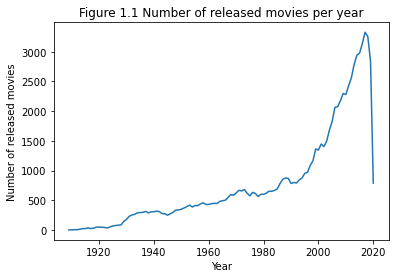

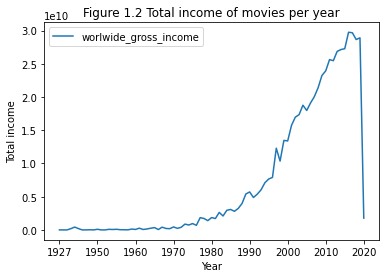

In [3]:
df=df.sort_values(by=['year'])
plt.subplot(1,1,1)
total_release=df['year'].value_counts()
total_release=total_release.sort_index(ascending=False)
total_release.plot()
plt.gca().invert_xaxis()
plt.title('Figure 1.1 Number of released movies per year')
plt.xlabel('Year')
plt.ylabel('Number of released movies')
total_budget=accurate_df[['year','worlwide_gross_income']].groupby(['year']).sum()
total_budget=total_budget.sort_index()
total_budget.plot()
plt.title('Figure 1.2 Total income of movies per year')
plt.xlabel('Year')
plt.ylabel('Total income')

From figure 1.1, it can be seen that the number of movie releases is still increasing and every year it reaches a new peak.
Meanwhile, in figure 1.2 it is clear total income is growing each year and this is obvious that one of the main factors of this result is the number of released movies. To prove that we can look at the year 2020 when the world had pandemia because of COVID-19. We can see that it is one of the lowest results in this graph

## Q2: How genre combinations and release date can affect at income?

Text(0, 0.5, 'Count')

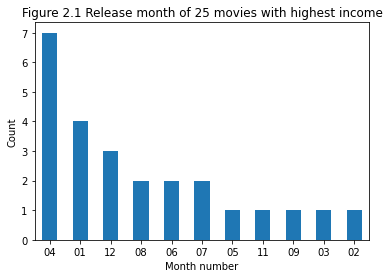

In [4]:
best_results=accurate_df[accurate_df['worlwide_gross_income']/accurate_df['budget']>=2].sort_values(by=['worlwide_gross_income'],ascending=False).head(25)
best_month=best_results.date_published.str[5:7].value_counts()
best_month.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Figure 2.1 Release month of 25 movies with highest income')
plt.xlabel('Month number')
plt.ylabel('Count')

Figure 2.1 shows in which month movies with the highest income were released. It is clear that the fourth month or April is best in terms of financial success

Text(0, 0.5, 'Genres')

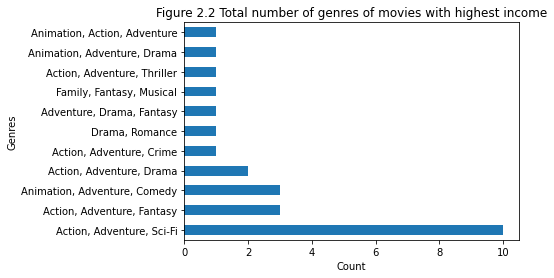

In [5]:
best_results.genre.value_counts().plot(kind='barh')
plt.title('Figure 2.2 Total number of genres of movies with highest income')
plt.xlabel('Count')
plt.ylabel('Genres')

From figure 2.2 we can understand that 10 of 25 movies have Action, Adventure, Sci-Fi genres. It should be noted that it is approximately 3 times bigger than the combination of the second-highest genres.
To conclude to film a financially successful movie it should be released in April and as we mentioned before it should be Action, Sci-Fi, adventure.

## Q3: Analysing critics and users opinion about IMDB's highest voted movies.

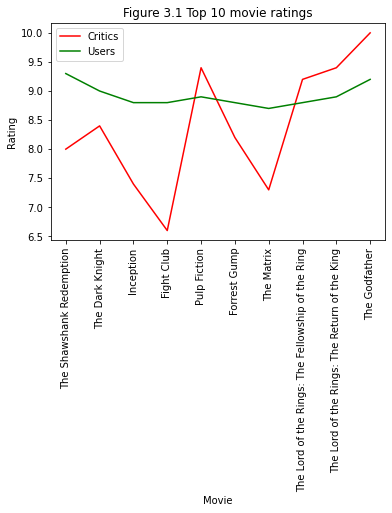

In [6]:
top_votes=accurate_df.sort_values(by=['votes'],ascending=False).head(10)
top_votes['metascore']=top_votes['metascore'].astype(float)/10
plt.plot(top_votes['original_title'],top_votes['metascore'],color='red',label='Critics')
plt.plot(top_votes['original_title'],top_votes['avg_vote'],color='green',label='Users')
plt.legend()
plt.xticks(rotation=90)
plt.title('Figure 3.1 Top 10 movie ratings')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.legend()

Figure 3.1 shows critics and users opinions about the highest voted movies on IMDB. As we can see users ratings placed in a small range between 8.5 and 9.5. In contrast that critics have more controversial ratings and the lowest ratings are close to 6.5 which was given to Fighters club. To conclude we can say that critics and users have different opinions about these films in some cases their difference can be 3 or more points.

## Q4: Which movie genres are preferred by each country in 2020 ?

<AxesSubplot:title={'center':'Figure 4.1 Genre and Country'}, xlabel='country', ylabel='genre'>

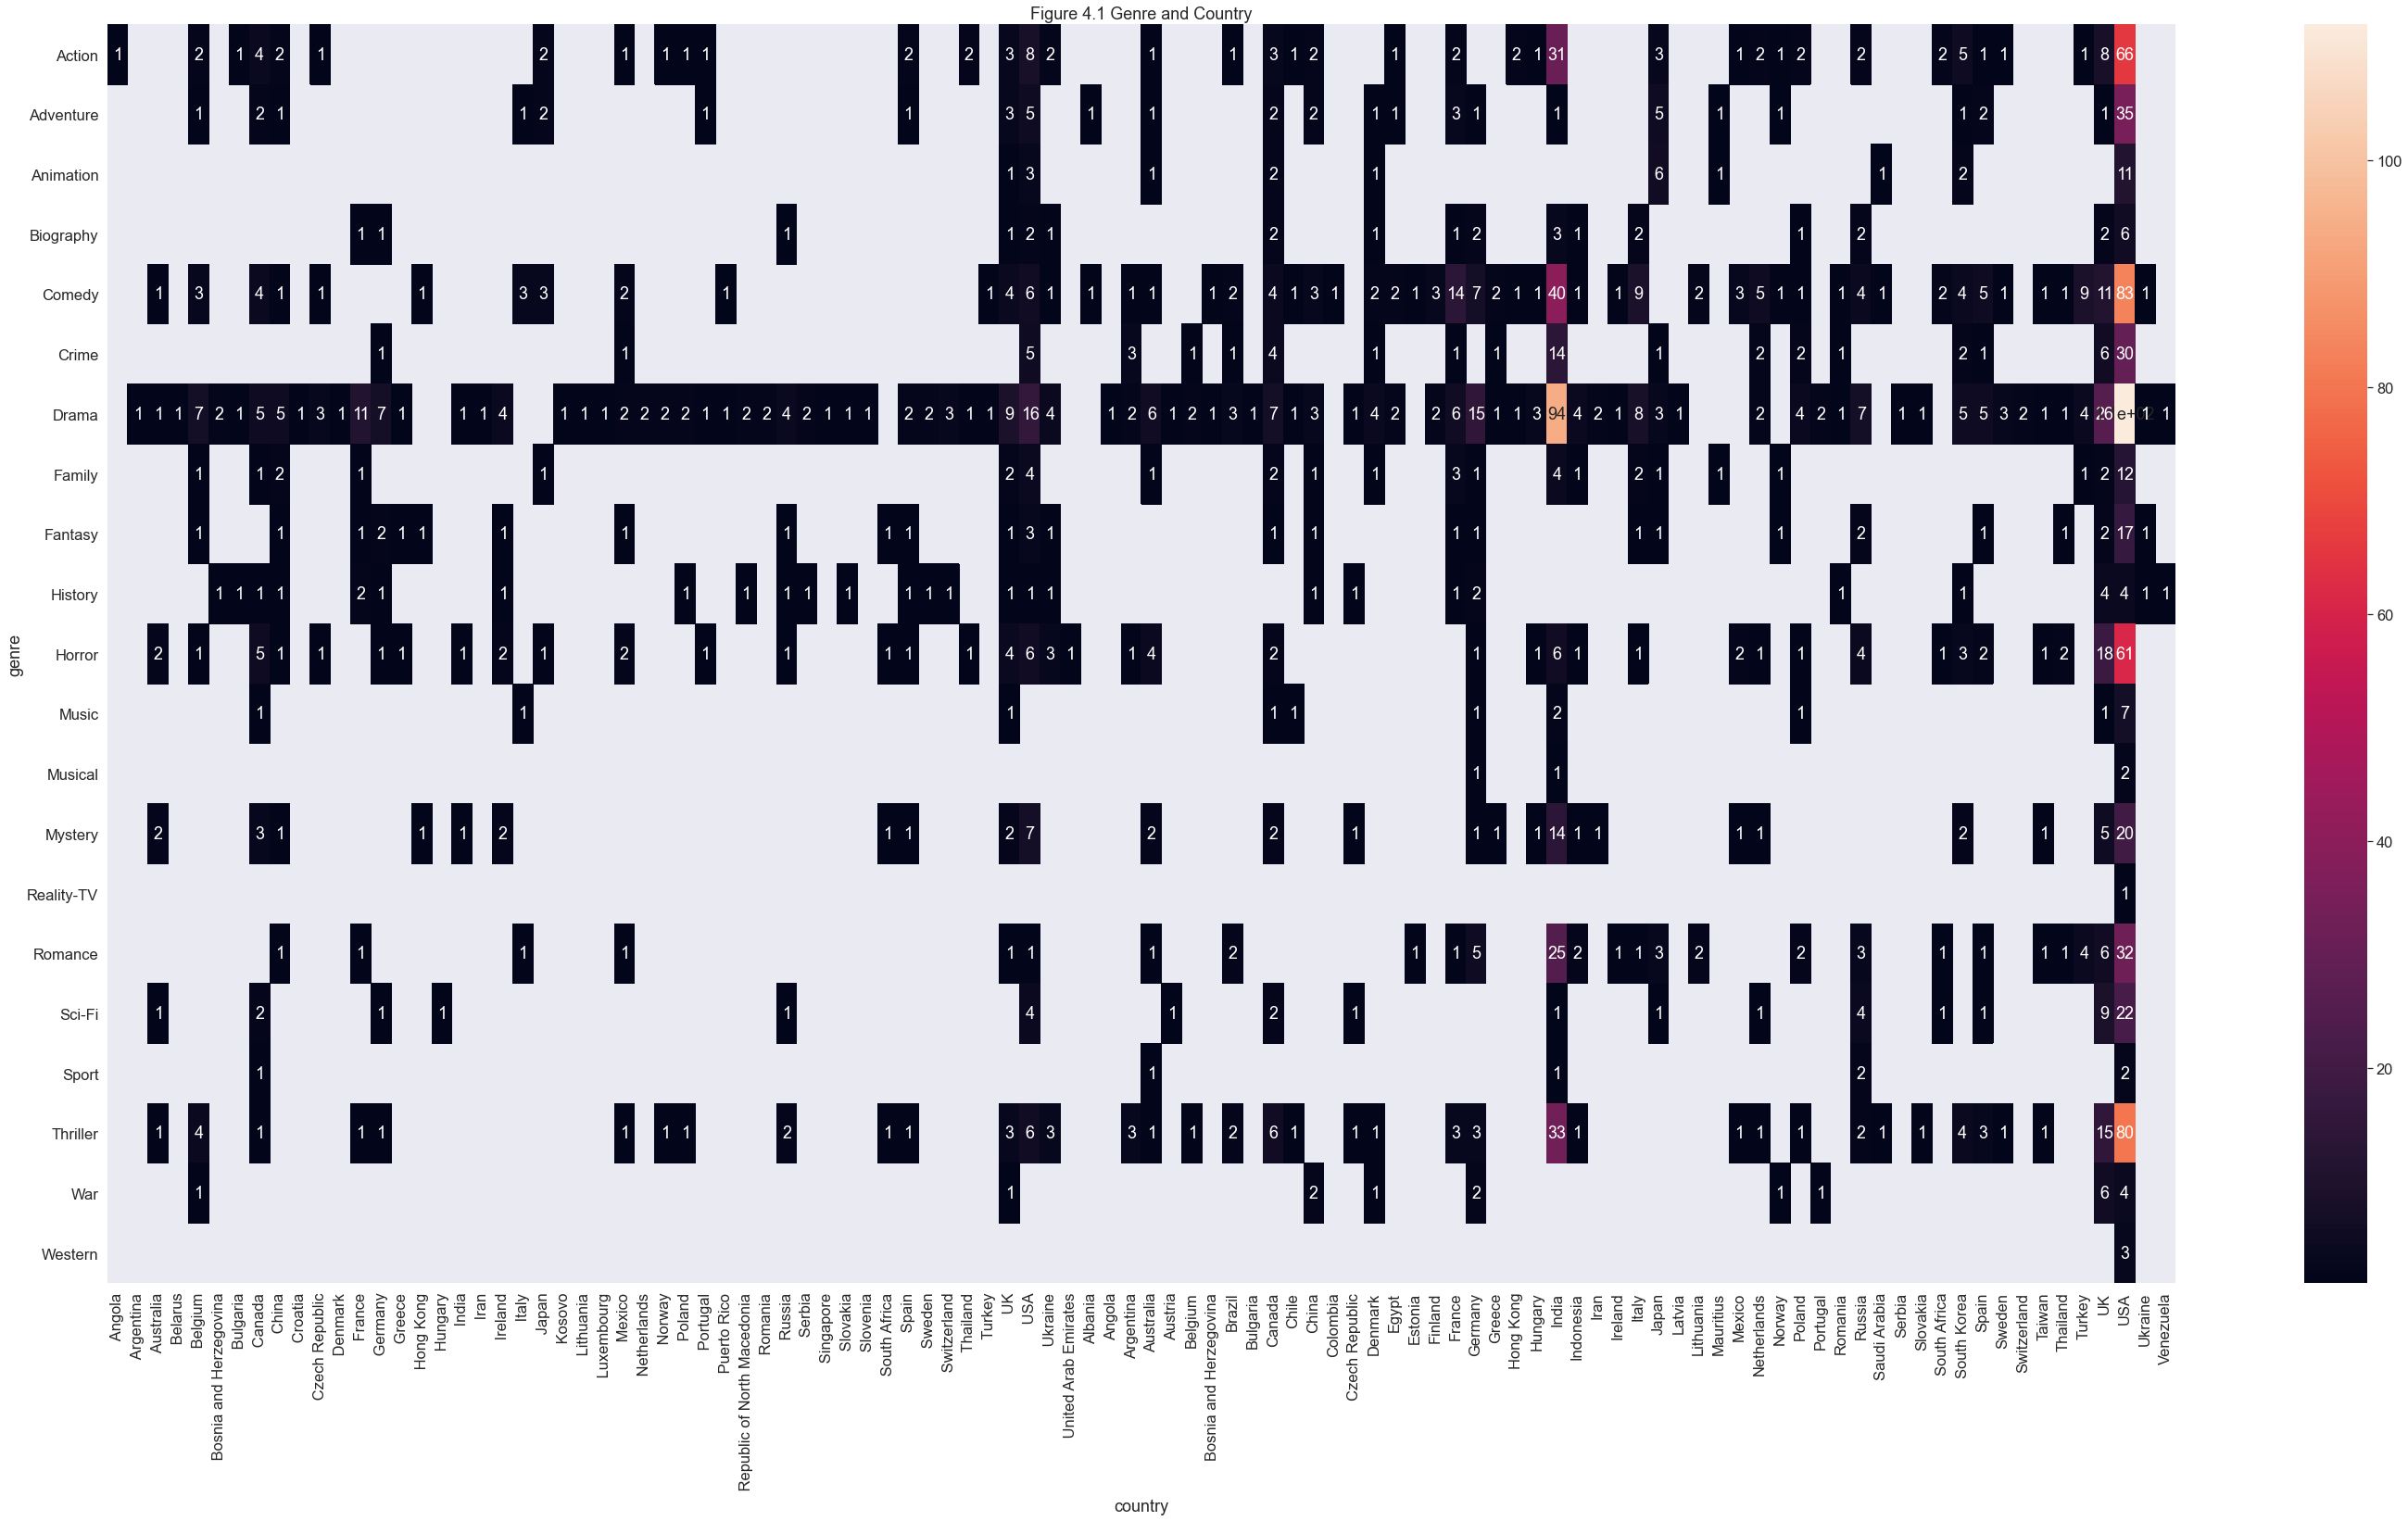

In [7]:
df_20=df[df['year'].astype('int')==2020]
df_20['genre']=df_20['genre'].str.split(", ")
df_20=df_20.explode('genre').reset_index(drop=True)
df_20['country']=df_20['country'].str.split(",")
df_20=df_20.explode('country').reset_index(drop=True)
total_country=df_20[['genre','country']].value_counts().reset_index(name="count")
total_country=total_country.sort_values(by='count')
result=total_country.pivot(index='genre',columns='country',values='count')
sns.set(font_scale = 1.5)
a=plt.subplots(figsize=(50,25))
a=plt.title('Figure 4.1 Genre and Country')
sns.heatmap(result,annot=True)

From Figure 4.1 we can see number of movies produced by each country and sorrted by genre. It is clear that USA produced at least one movie at each genre. Drama genre shows one of best results only 7 countries have no movies with such genre. After it we have comedy with record of 83 in USA and 40 in India. In contrast of that Reality TV and Western are worst because only USA have such movies.

## Q5: Divide movies into groups by duration and find does duration affect at a number of votes?

Text(0.5, 1.0, 'Figure 5.1 Votes and movie category')

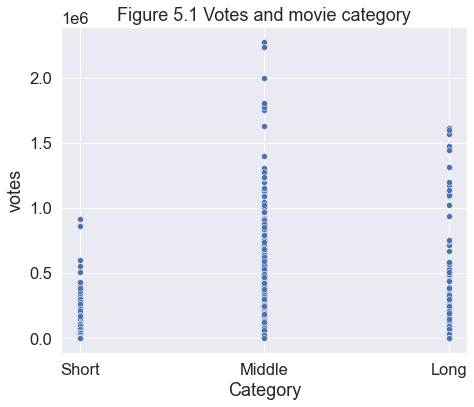

In [8]:
movie_with_group=df
movie_with_group.loc[(movie_with_group.duration <= 90), 'Category'] = 'Short' 
movie_with_group.loc[(movie_with_group.duration > 90) & (movie_with_group.duration < 160), 'Category'] = 'Middle' 
movie_with_group.loc[(movie_with_group.duration >= 160), 'Category'] = 'Long'
fig=plt.figure(figsize=(16,6))
a=fig.add_subplot(122)
sns.scatterplot(x='Category',y='votes',data=movie_with_group)
a.set_title('Figure 5.1 Votes and movie category')

Figure 5.1 shows a scatter plot of different movie categories and their votes. We can see that the Middle category has the highest votes and biggest votes range. In contrast to that short shows, worst results and most of the movies have a low number of votes.

## Conclusion 

To conclude the Movie sphere is one of the most financially successful industries. Even though in 2020 it had one of the lowest results fact that every year it has progression shouldn't be forgotten. The interesting fact some key factors such as category and release month affect it. In terms of the impact of each country, it is obvious that the USA has the biggest role and influence.